# Used Car Price Prediction

# Task to perform
1. Select dataset
1. Carry out Exploratory Data Analaysis
1. Apply Algorithm
1. Extract association rules

# 1. Dataset - used car price
## Dataset Description

| columns      | description                                |
| ------------ | ------------------------------------------ |
| model        | The model name for Volkswagen Car.         |
| year         | The registration year of the car.          |
| price        | Price of the car                           |
| transmission | The type of transmission used by the car.  |
| mileage      | The total distance the car has travelled.  |
| fuelType     | The type of fuel used by the car.          |
| tax          | Tax applied on the car.                    |
| mpg          | Miles per gallon                           |
| engineSize   | The displacement volume of the car engine. |


importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read Data

In [2]:
data = pd.read_csv('./vw.csv')
data.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10806,Tiguan,2019,24400,Automatic,4900,Diesel,145,46.3,2.0
5850,Passat,2017,14498,Semi-Auto,87749,Hybrid,0,166.0,1.4
2288,Golf,2019,20687,Automatic,10324,Petrol,145,45.6,1.5
13935,Arteon,2019,28622,Semi-Auto,6601,Diesel,145,50.4,2.0
13576,Touareg,2020,49999,Semi-Auto,501,Diesel,145,33.6,3.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


All data is complete, no null values

In [4]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# 2. Exploratory Data Analysis

### Numeric Features

In [5]:
data.select_dtypes(include=['int','float']).describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [6]:
from datetime import datetime

data['age'] = datetime.now().year - data['year']
data.drop('year', axis=1, inplace=True)
data.head(3)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0,3
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0,3
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0,3


Deleting year and calculating age for each cars as it is more intuitive

#### Price

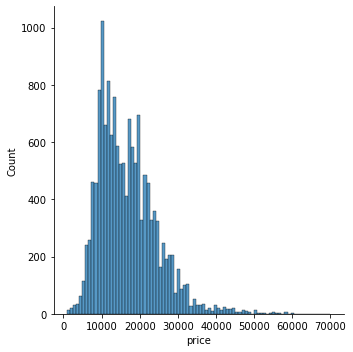

In [7]:
sns.displot(data['price'])

count    15157.000000
mean     16838.952365
std       7755.015206
min        899.000000
25%      10990.000000
50%      15497.000000
75%      20998.000000
max      69994.000000
Name: price, dtype: float64 



<AxesSubplot:>

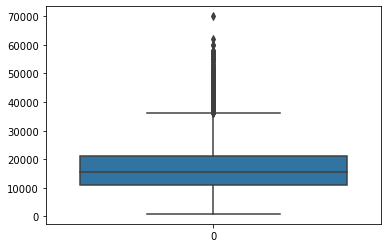

In [8]:
print(data['price'].describe(), "\n")
sns.boxplot(data=data.price)

In [9]:
data_price_max = data['price'].quantile(0.99,interpolation='midpoint')
data[data['price'] >= data_price_max]
data.drop(data[data['price'] >= data_price_max].index, inplace=True)

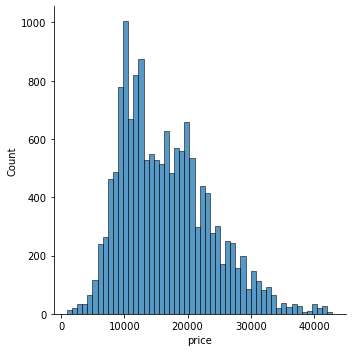

In [10]:
sns.displot(data.price)

count    15004.000000
mean     16518.011197
std       7092.216650
min        899.000000
25%      10978.750000
50%      15470.000000
75%      20990.000000
max      42900.000000
Name: price, dtype: float64 



<AxesSubplot:>

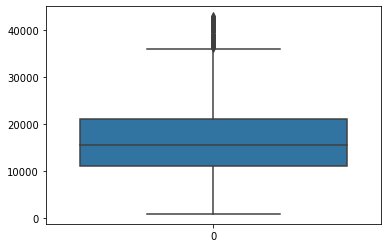

In [11]:
print(data['price'].describe(), "\n")
sns.boxplot(data=data.price)

**Which features affects the price the most?**

In [12]:
data.corr()['price'].sort_values(ascending=False)

price         1.000000
engineSize    0.554283
tax           0.497881
mpg          -0.482993
mileage      -0.534499
age          -0.635182
Name: price, dtype: float64

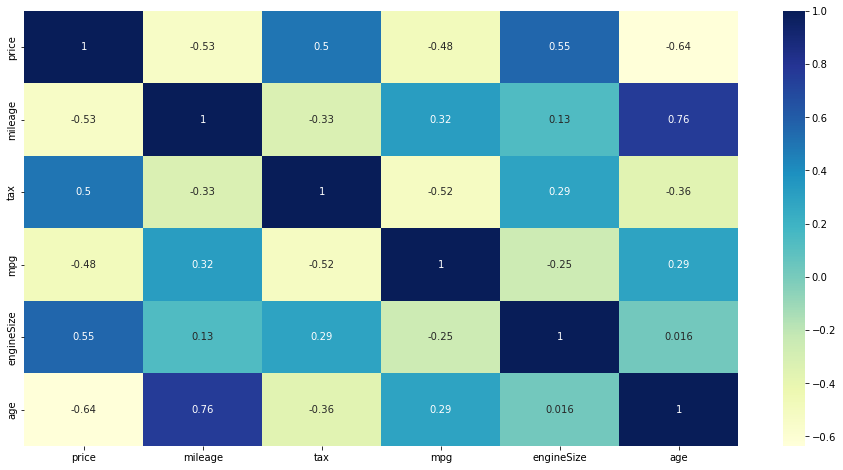

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

From the heatmap, we can see that age, engineSize and mileage has the more affect to price.

#### Age (Year)

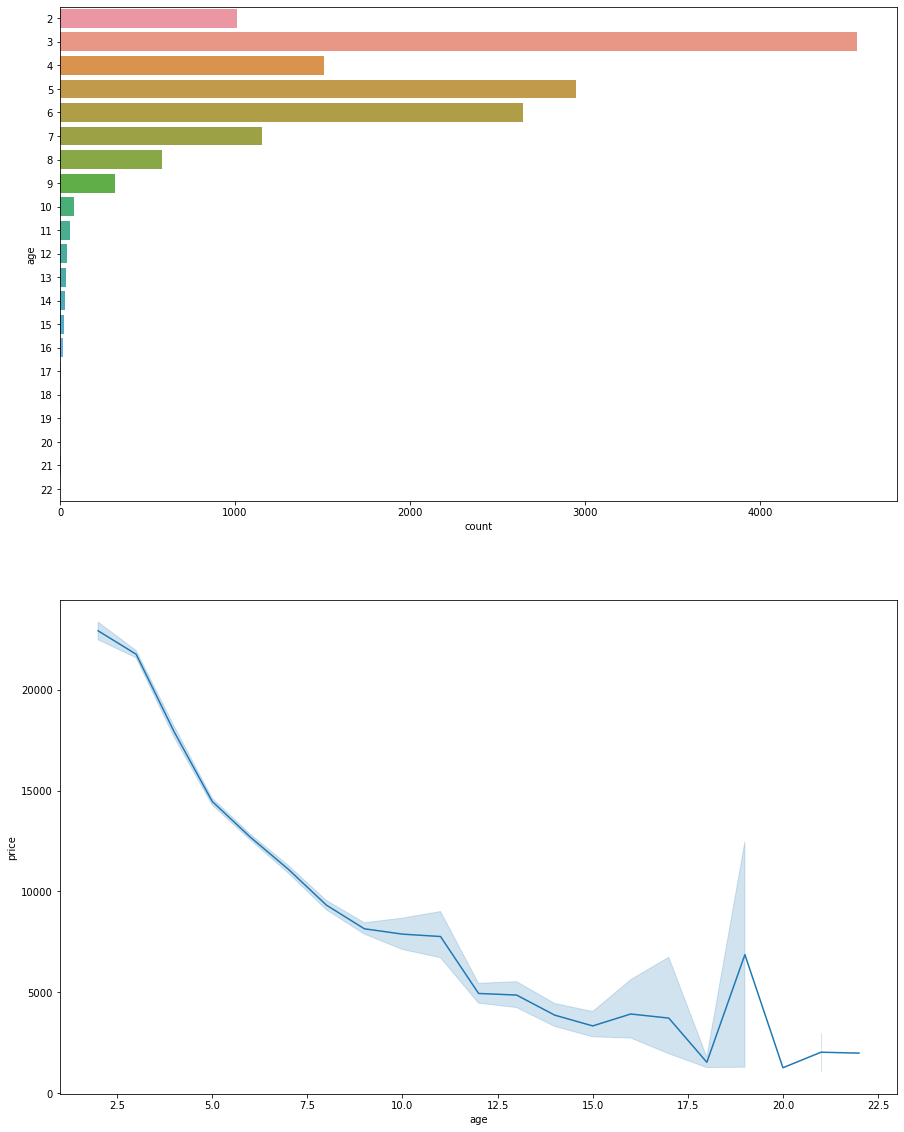

In [14]:
plt.figure(figsize=(15,20))

plt.subplot2grid((2, 1), (0, 0))
sns.countplot(y=data['age'])

plt.subplot2grid((2, 1), (1, 0))
sns.lineplot(x='age',y='price',data=data)
plt.show()


<AxesSubplot:>

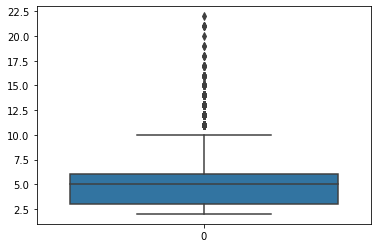

In [15]:
sns.boxplot(data=data['age'])

In [16]:
data_age_max = data['age'].quantile(0.99, interpolation='midpoint')
data[data['age'] >= data_age_max]
data.drop(data[data['age'] >= data_age_max].index, inplace=True)

<AxesSubplot:>

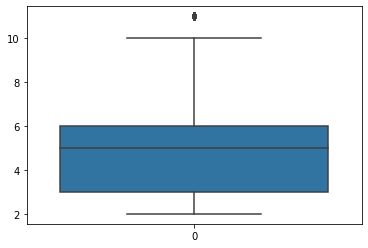

In [17]:
sns.boxplot(data=data['age'])

Majority age is 3 years, and younger car are more expensive.

#### mpg

<AxesSubplot:xlabel='mpg'>

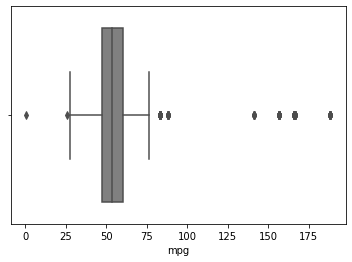

In [18]:
sns.boxplot(data=data,x='mpg',color='grey')

In [19]:
data = data.drop(data[data['mpg'] > 75].index)
data = data.drop(data[data['mpg'] < 25].index)

#### mileage

Text(0.5, 1.0, 'Distribution of Mileage')

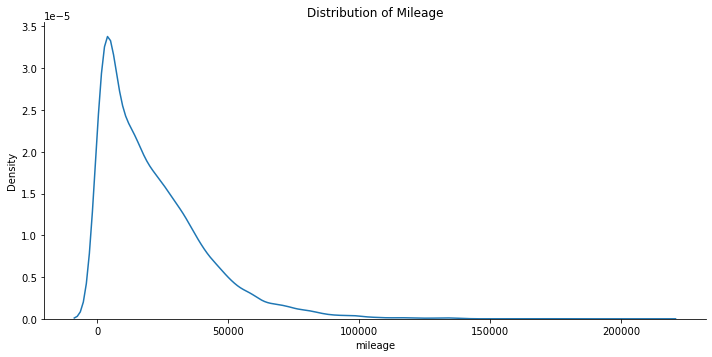

In [20]:
sns.displot(data=data,x='mileage',kind='kde',aspect=10/5,height=5)
plt.title('Distribution of Mileage')

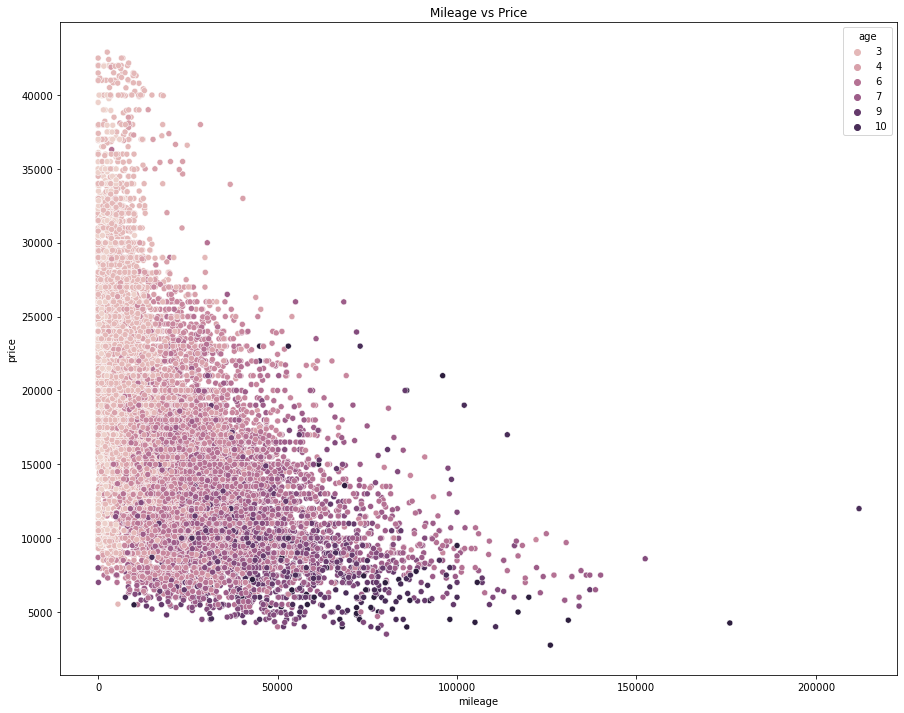

In [21]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=data['mileage'],y=data['price'],hue=data['age'])
plt.title('Mileage vs Price')
plt.show()

When mileage is between 0 - 50000, the price is not affected much, but after 50000 the price of the car could drop significantly.

Remove some outliers

In [22]:
data.drop(data[data['mileage'] > 140000].index, inplace=True)


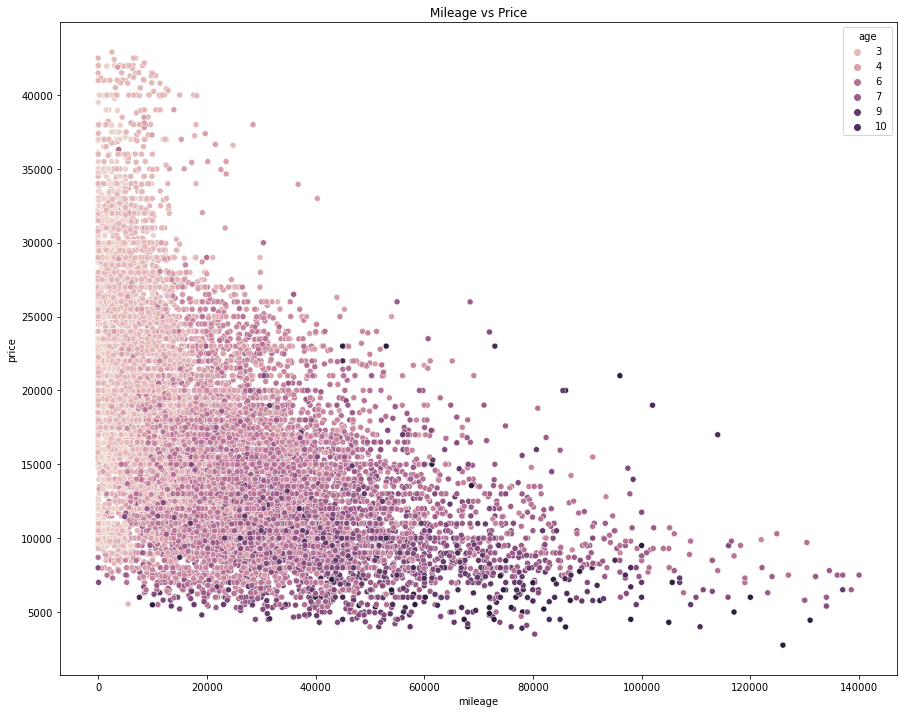

In [23]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=data['mileage'],y=data['price'],hue=data['age'])
plt.title('Mileage vs Price')
plt.show()

#### tax

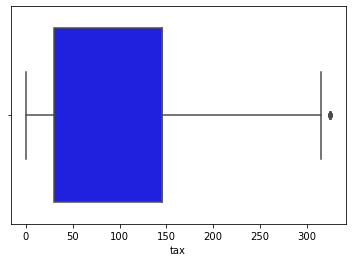

In [24]:
sns.boxplot(data=data, x='tax', color='blue')
plt.show()

In [25]:
data.drop(data[data['tax'] > 400].index, inplace=True)

#### Engine Size

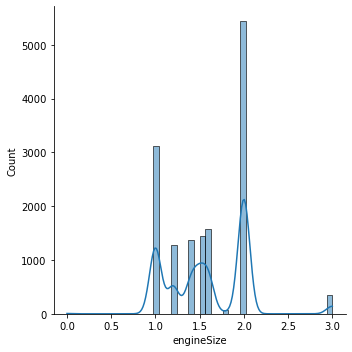

In [26]:
sns.displot(data['engineSize'], kde=True)

### Categories Features

In [27]:
data.select_dtypes(include=['object']).describe()

,model,transmission,fuelType
count,14679,14679,14679
unique,25,3,4
top,Golf,Manual,Petrol
freq,4722,9215,8460


#### Model

In [28]:
pd.DataFrame(
    data.groupby('model').mean().sort_values(by='price',
                                               ascending=False)['price'])


,price
model,
Caravelle,32996.854167
Tiguan Allspace,28770.296703
Touareg,28763.736264
Amarok,27688.816514
Arteon,26285.020161
Shuttle,24388.147541
T-Roc,22839.391542
Sharan,22211.189922
Tiguan,21720.506271


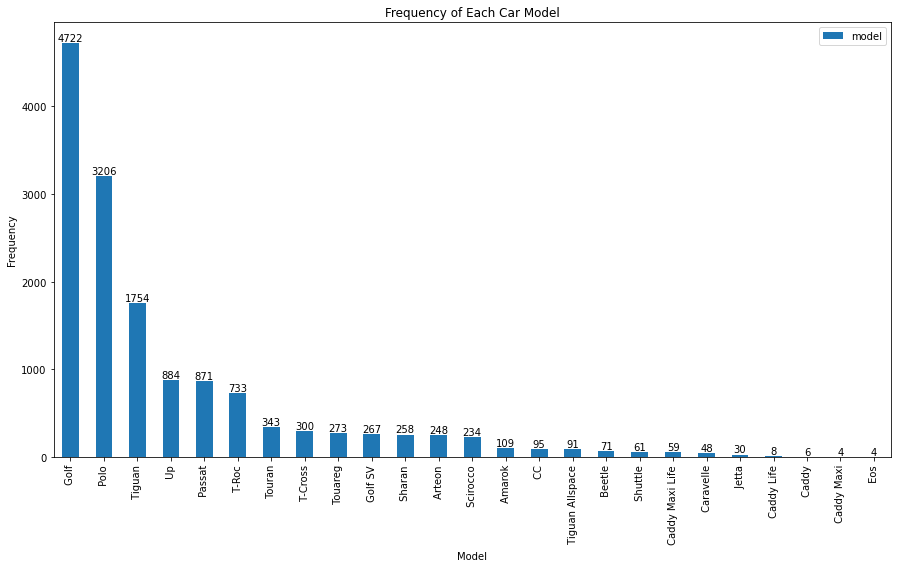

In [29]:
# print(data['model'].value_counts().sort_values(ascending=False) / len(data) * 100)

plt.figure(1, figsize=(15, 8))
ax = data['model'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Frequency of Each Car Model')
plt.xlabel('Model')
plt.ylabel('Frequency')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

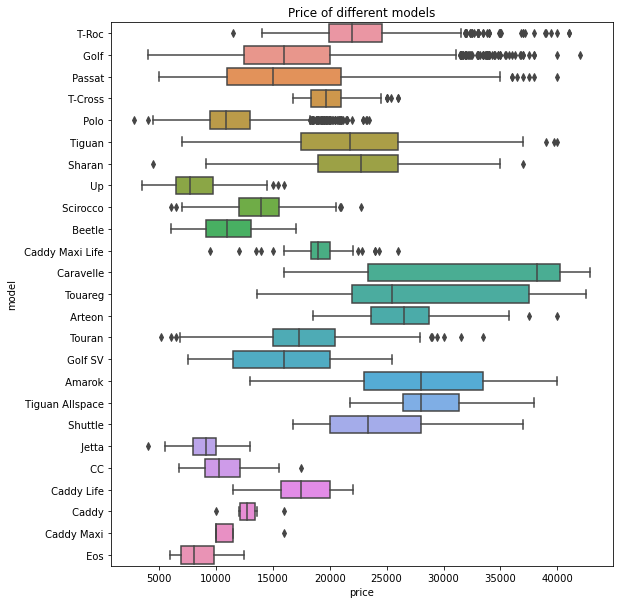

In [30]:
plt.figure(figsize=(9,10))
sns.boxplot(data=data,y='model',x='price')
plt.title('Price of different models')
plt.show()

Some of the model has less sample size, so we will drop it.

In [31]:
data = data[data.groupby('model').model.transform(len) > 100]

#### Fuel Type

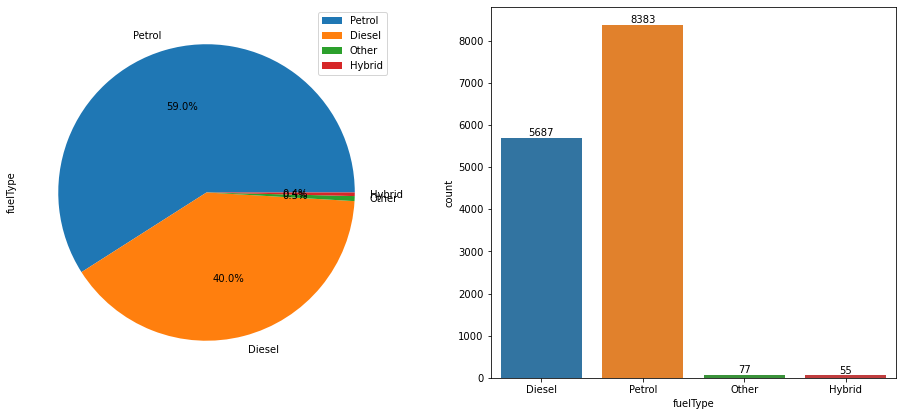

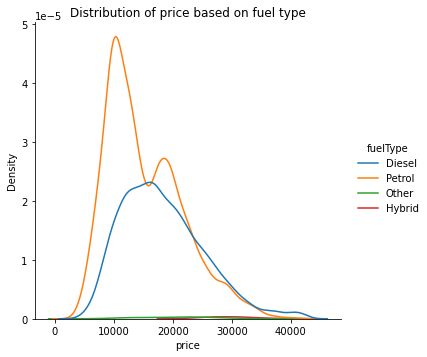

In [32]:
plt.figure(figsize=(16,15))
plt.subplot2grid((2,2),(0,0))
data['fuelType'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend()

plt.subplot2grid((2, 2), (0, 1))
ax= sns.countplot(x=data['fuelType'])
plt.bar_label(ax.containers[0])
plt.show()

sns.displot(data=data,x='price',kind='kde',hue='fuelType')
plt.title('Distribution of price based on fuel type')
plt.show()


In [33]:
data = data.drop(data[data.fuelType == 'Hybrid'].index)
data = data.drop(data[data.fuelType == 'Other'].index)


#### Transmission

Text(0.5, 1.0, 'Count of different types of transmission')

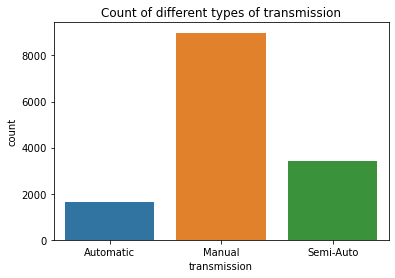

In [34]:
sns.countplot(data=data,x='transmission')
plt.title('Count of different types of transmission')

<AxesSubplot:xlabel='transmission', ylabel='price'>

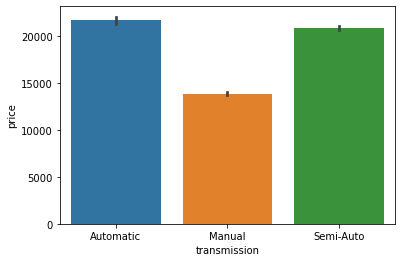

In [35]:
sns.barplot(x=data['transmission'],y=data['price'])

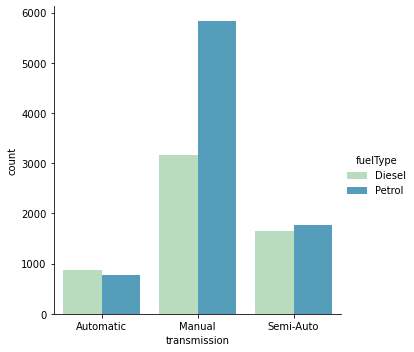

In [36]:
sns.catplot(x='transmission',data=data,kind='count', hue='fuelType', palette='GnBu')

Most of the auto car use diesel, most of the manual car use petrol. Auto car has higher price and most of the car is manual car.

## Feature Engineering

### Feature with category - OneHotEncoder

In [37]:
from sklearn.preprocessing import OneHotEncoder
cat_columns = ['model', 'transmission', 'fuelType']

In [38]:
oneHotEncoder = OneHotEncoder()
cat_features = oneHotEncoder.fit_transform(data[cat_columns]).toarray()
cat_features

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [39]:
oneHotEncoder.categories_

[array([' Amarok', ' Arteon', ' Golf', ' Golf SV', ' Passat', ' Polo',
        ' Scirocco', ' Sharan', ' T-Cross', ' T-Roc', ' Tiguan',
        ' Touareg', ' Touran', ' Up'], dtype=object),
 array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object),
 array(['Diesel', 'Petrol'], dtype=object)]

### Number features - 

In [40]:
from sklearn.preprocessing import StandardScaler
num_columns = ['mileage', 'tax', 'mpg', 'engineSize', 'age']


In [41]:
standardScaler = StandardScaler()
num_features = standardScaler.fit_transform(data[num_columns])
num_features

array([[-0.37844843,  0.54954842, -0.39109974,  0.92069343, -0.92353988],
       [-0.85624349,  0.54954842, -0.39109974,  0.92069343, -0.92353988],
       [-0.71037842,  0.54954842, -0.30872459,  0.92069343, -0.92353988],
       ...,
       [ 3.91413767,  2.40420556, -1.86355556,  0.92069343,  1.31413984],
       [ 0.85393754,  2.40420556, -1.86355556,  0.92069343,  1.31413984],
       [-0.06666951,  2.48484283, -1.77088351,  3.11716942, -0.36411995]])

In [42]:
all_columns = [
    ' Amarok', ' Arteon', ' Golf', ' Golf SV', ' Passat', ' Polo', ' Scirocco',
    ' Sharan', ' T-Cross', ' T-Roc', ' Tiguan', ' Touareg', ' Touran', ' Up',
    'Automatic', 'Manual', 'Semi-Auto', 'Diesel', 'Petrol', '1'
    'mileage', 'tax', 'mpg', 'engineSize', 'age',
]

In [43]:
np.hstack([cat_features, num_features]).shape

(14070, 24)

In [44]:
data_encoded = pd.DataFrame(np.hstack([cat_features, num_features]),
                            columns=all_columns)
data_encoded['price'] = data['price']
data_encoded


,Amarok,Arteon,Golf,Golf SV,Passat,Polo,Scirocco,Sharan,T-Cross,T-Roc,...,Manual,Semi-Auto,Diesel,Petrol,1mileage,tax,mpg,engineSize,age,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-0.378448,0.549548,-0.391100,0.920693,-0.92354,25000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,-0.856243,0.549548,-0.391100,0.920693,-0.92354,26883.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,-0.710378,0.549548,-0.308725,0.920693,-0.92354,20000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.842792,0.549548,-2.151869,0.920693,-0.92354,33492.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,-0.757125,0.630186,-1.400195,-0.177545,-0.92354,22900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.837725,2.404206,-1.770884,3.117169,0.19530,27000.0
14066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.057392,2.404206,-1.863556,0.920693,0.75472,27999.0
14067,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.914138,2.404206,-1.863556,0.920693,1.31414,24800.0
14068,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.853938,2.404206,-1.863556,0.920693,1.31414,24599.0


In [45]:
data_encoded.corr()['price'].sort_values(ascending=False)

price         1.000000
 T-Roc        0.226822
 Touran       0.209296
 Tiguan       0.207117
 Golf SV      0.203589
engineSize    0.194086
Diesel        0.159752
 Amarok       0.136527
tax           0.135563
Semi-Auto     0.076315
 Sharan       0.063564
Automatic     0.061106
 Golf         0.047257
 Passat       0.021653
 Arteon      -0.041246
1mileage     -0.043138
 T-Cross     -0.062713
 Up          -0.096965
age          -0.099804
Manual       -0.108878
 Touareg     -0.140128
 Scirocco    -0.148453
Petrol       -0.159752
mpg          -0.161767
 Polo        -0.333001
Name: price, dtype: float64

<AxesSubplot:>

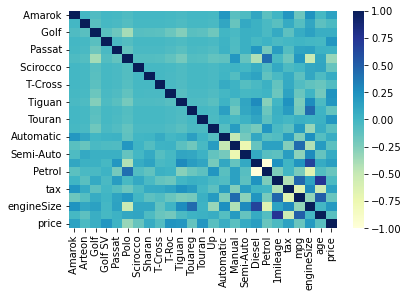

In [46]:
sns.heatmap(data_encoded.corr(), cmap='YlGnBu')

## X and Y

In [47]:
X = np.hstack([cat_features, num_features])
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.39109974,
         0.92069343, -0.92353988],
       [ 0.        ,  0.        ,  0.        , ..., -0.39109974,
         0.92069343, -0.92353988],
       [ 0.        ,  0.        ,  0.        , ..., -0.30872459,
         0.92069343, -0.92353988],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.86355556,
         0.92069343,  1.31413984],
       [ 1.        ,  0.        ,  0.        , ..., -1.86355556,
         0.92069343,  1.31413984],
       [ 1.        ,  0.        ,  0.        , ..., -1.77088351,
         3.11716942, -0.36411995]])

In [48]:
y = data["price"].to_numpy()
y

array([25000, 26883, 20000, ..., 12995, 15995, 27895], dtype=int64)

## Modeling

### Splitting training and testing data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10552, 24), (3518, 24), (10552,), (3518,))

#### Select best features

<AxesSubplot:>

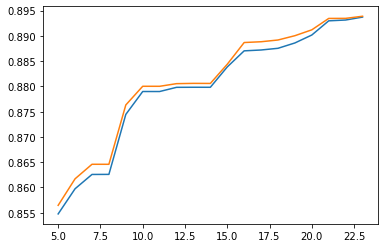

In [52]:
# from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.linear_model import LinearRegression

# column_names = data_encoded.drop(columns=['price']).columns

# no_of_features = []
# r_squared_train = []
# r_squared_test = []

# # selector = SelectKBest(f_regression, k=10)
# # selector.fit(X_train, y_train)
# # X_test_transformed = selector.transform(X_test)


# for k in range(5, 24):
#     selector = SelectKBest(f_regression, k=k)
#     X_train_transformed = selector.fit_transform(X_train, y_train)
#     X_test_transformed = selector.transform(X_test)
#     regressor = LinearRegression()
#     regressor.fit(X_train_transformed, y_train)
#     no_of_features.append(k)
#     r_squared_train.append(regressor.score(X_train_transformed, y_train))
#     r_squared_test.append(regressor.score(X_test_transformed, y_test))

# sns.lineplot(x=no_of_features, y=r_squared_train, legend='full')
# sns.lineplot(x=no_of_features, y=r_squared_test, legend='full')

# 3. Apply Algorithm